## Часть 1. EDA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm # нормальное распределение 
from scipy import stats
from datetime import datetime, date, time

In [67]:
df = pd.read_excel('E:/Nikita/Python_Course/ML_Basic_Final_Project/archive/sleepdata_2.xlsx')

In [68]:
df.shape

(921, 21)

In [69]:
df.head()

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (В°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,0.60,0.00,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,0.73,0.00,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,0.86,0.96,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,0.77,0.92,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,0.78,0.94,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        921 non-null    datetime64[ns]
 1   End                          921 non-null    datetime64[ns]
 2   Sleep Quality                921 non-null    float64       
 3   Regularity                   921 non-null    float64       
 4   Mood                         0 non-null      float64       
 5   Heart rate (bpm)             921 non-null    int64         
 6   Steps                        921 non-null    int64         
 7   Alarm mode                   921 non-null    object        
 8   Air Pressure (Pa)            492 non-null    float64       
 9   City                         487 non-null    object        
 10  Movements per hour           921 non-null    object        
 11  Time in bed (seconds)        921 non-null    

Описание признаков:

1. Start - время включения мониторинга сна
2. End - время отключения мониторинга сна
3. Sleep Quality - качество сна
4. Regularity - регулярность сна (насколько часто ты ложишься и просыпаешься в одно и то же время)
5. Mood - настроение во время пробуждения
6. Heart rate (bpm) - пульс
7. Steps - шаги в течение дня
8. Alarm mode - режим будильника
9. Air Pressure (Pa) - давление воздуха
10. City - город
11. Moverments per hour - количество движений в час
12. Time in bed (seconds) - время в кровати (в секундах)
13. Time in asleep (seconds) - время сна (в секундах)
14. Time before sleep (seconds) - время погружения в сон (?)
15. Window start - ?
16. Window stop - ?
17. Did snore - храп (да/нет)
18. Snore time - продолжительность храпа
19. Weather temperature (В°C) - температура
20. Weather type - погода
21. Notes - заметки

Целевая переменная - Sleep Quality

In [71]:
df.describe()

,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Air Pressure (Pa),Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time
count,921.000000,921.000000,0.0,921.0,921.000000,492.000000,921.000000,921.000000,921.000000,921.000000
mean,0.779023,0.843648,NaN,0.0,5311.599349,68.660163,27505.497611,23912.683170,1001.556135,312.944300
std,0.128580,0.125450,NaN,0.0,4396.822762,41.845368,3916.696288,4066.189356,1046.287777,455.472848
min,0.070000,-0.010000,NaN,0.0,0.000000,0.000000,1852.800000,0.000000,0.000000,0.000000
25%,0.710000,0.820000,NaN,0.0,2299.000000,0.000000,25500.600000,21627.500000,449.900000,0.000000
50%,0.780000,0.860000,NaN,0.0,4245.000000,93.700000,27422.900000,23919.000000,563.700000,148.000000
75%,0.860000,0.910000,NaN,0.0,7452.000000,94.400000,29530.100000,26257.000000,1287.000000,440.000000
max,1.000000,1.000000,NaN,0.0,38165.000000,96.500000,46703.400000,45769.400000,5677.700000,4477.300000


При первичном анализе признаков видно, что из датасета можно удалить признаки Mood (т.к. там одни пропуски), Heart rate (т.к. все значения равны 0, а следовательно - измерения не велись), Window start и Window stop (малоинформативны),City (много пропусков + object), Weather temperature (В°C)(object + малоинформативен), Notes (много пропусков).

In [72]:
cols_2_drop = ['Mood', 'Heart rate (bpm)', 'City', 'Window start', 'Window stop', 'Weather temperature (В°C)','Notes', 'Start','End']
df = df.drop(cols_2_drop, axis = 1)

Построим график распредедления целевой переменной - Sleep Quality.

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


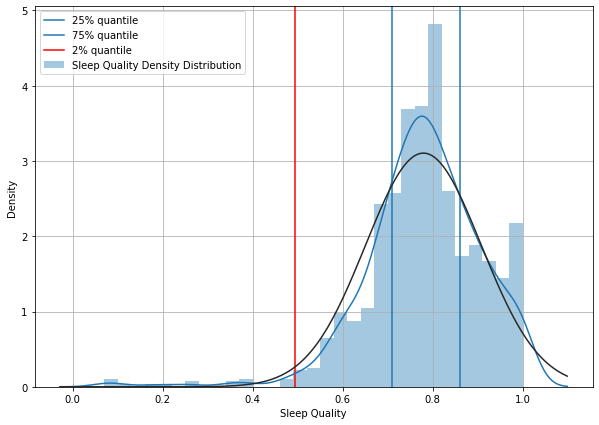

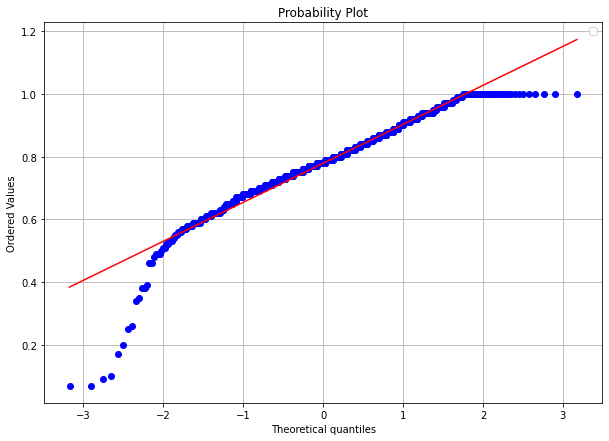

In [73]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
plt.grid(True)
# plt.subplots(figsize=(7,7))
plt.axvline(df['Sleep Quality'].quantile(0.25), label = '25% quantile')
plt.axvline(df['Sleep Quality'].quantile(0.75), label = '75% quantile')
plt.axvline(df['Sleep Quality'].quantile(0.02), label = '2% quantile', color = 'red')
sns.distplot(df['Sleep Quality'], label = 'Sleep Quality Density Distribution', fit = norm)
plt.legend()

plt.figure(figsize=(10,7))
stats.probplot(df['Sleep Quality'], plot=plt)
plt.grid(True)
plt.legend()

plt.show()

Выше приведено распределение целевой переменной. Как видим, оно почти совпадает с нормальным (вопрос - почему стремимся к нормализации даных?). Слева наблюдается множество выбросов значений целевой переменной, которые меньше квантиля 2 %. От них можно избавиться.

In [74]:
df = df.loc[df['Sleep Quality']> df['Sleep Quality'].quantile(0.02)]
df.shape

(902, 12)

В результате потеряли 19 значений.

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


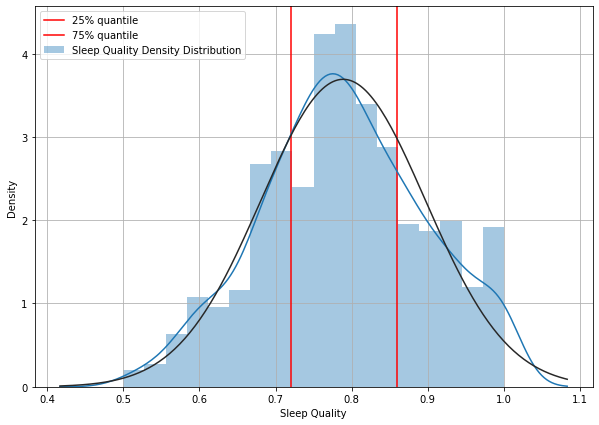

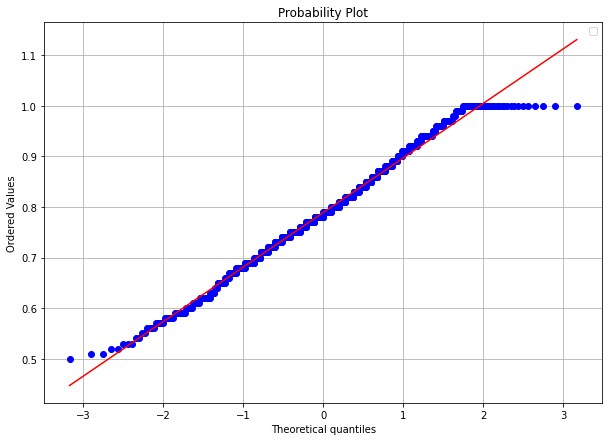

In [75]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
plt.axvline(df['Sleep Quality'].quantile(0.25), label = '25% quantile', color = 'red')
plt.axvline(df['Sleep Quality'].quantile(0.75), label = '75% quantile', color = 'red')
sns.distplot(df['Sleep Quality'], label = 'Sleep Quality Density Distribution', fit = norm)
plt.legend()
plt.grid(True)

plt.figure(figsize=(10,7))
stats.probplot(df['Sleep Quality'], plot=plt)
plt.grid(True)
plt.legend()
plt.show()

Результат значительно улучшился.

Построим матрицу корреляций признаков.

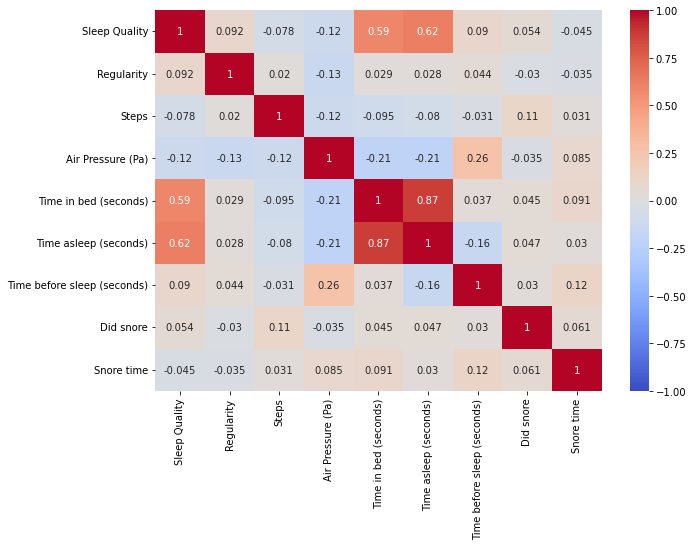

In [76]:
plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
sns.heatmap(df.corr(), cmap = sns.color_palette('coolwarm', 10000), vmin = -1, center = 0, annot = True)
plt.show()

По матрице корреляций видно, что качество сна умеренно коррелирует с временем сна и временем в кровати, давление воздуха коррелирует с временем погружения в сон, а время в кровати и время сна почти полностью коррелируют между собой, так что имеет смысл исключить один из этих двух параметров, например параметр Time in bed (seconds).

In [77]:
df = df.drop('Time in bed (seconds)', axis = 1)

#### Посмотрим теперь, как остальные параметры влияют на целевую переменную.

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 920
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sleep Quality                902 non-null    float64
 1   Regularity                   902 non-null    float64
 2   Steps                        902 non-null    int64  
 3   Alarm mode                   902 non-null    object 
 4   Air Pressure (Pa)            484 non-null    float64
 5   Movements per hour           902 non-null    object 
 6   Time asleep (seconds)        902 non-null    float64
 7   Time before sleep (seconds)  902 non-null    float64
 8   Did snore                    902 non-null    bool   
 9   Snore time                   902 non-null    float64
 10  Weather type                 902 non-null    object 
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 78.4+ KB
None


#### Создадим новый признак!

Так как в исходном датасете признак Mood не был заполнен, то попробуем сделать это сами с помощью переменной Sleep Quality. Будем считать, что если переменная Sleep Quality находится в диапазоне между 0.75 - 1.0, то настроение утром будет хорошим, если значение меньше 0.75 - плохим.

In [79]:
mood_list = []
for i, row in df.iterrows():
    if row['Sleep Quality'] >= 0.75:
        mood_list.append(1)
    else:
        mood_list.append(0)
df['Mood'] = mood_list

##### Regularity

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Regularity'>

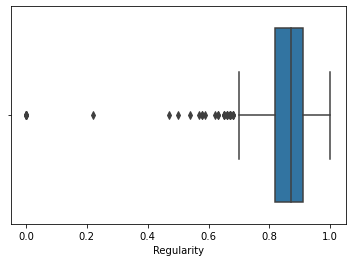

In [80]:
sns.boxplot(df['Regularity'])

Уберём выбросы по параметру Regularity.

In [81]:
df = df.loc[df['Regularity'] > 0.6]
df.shape

(888, 12)

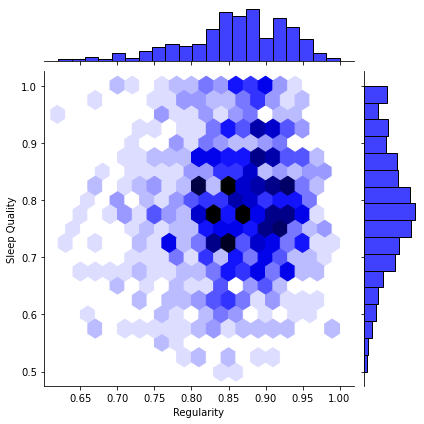

In [82]:
sns.jointplot(data =  df, x = 'Regularity', y = 'Sleep Quality', kind = 'hex',color = 'blue')

Из графика видим, режим с что чаще всего, при поддержании режима сна на уровне 80-87 процентов, качество сна будет в пределах 70 - 85 процентов. Также видно некоторое отклонение - реже всего удается поддерживать режим сна на уровне 90%, однако именно при таком значении регулярности наблюдается большое количество значений, при котором качество сна тоже больше 90 %.

Посмотрим, как зависит парметр времени погружения в сон от параметра регулярности соблюдения режима сна. При этом будем варьировать верхний предел времени погружения в сон.

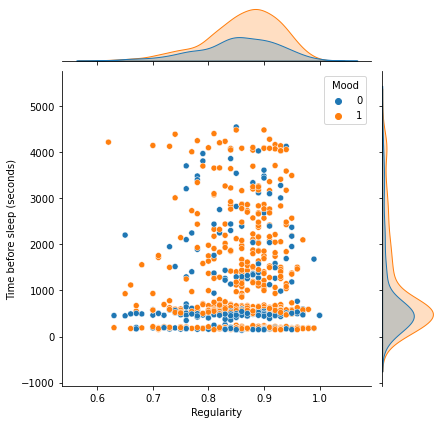

In [83]:
sns.jointplot(data = df[df['Time before sleep (seconds)'] < 5000], x = 'Regularity', y = 'Time before sleep (seconds)', kind = 'scatter', hue = 'Mood')

На графике видим интересную закономерность - параметр Time before sleep разбит на три интервала: 150 до 250 секунд, от 450 до 700 секунд и всё что больше 1000 секунд. Из этого можно сделать вывод, что существуют промежутки времени, в которые человек просто не может заснуть, независимо от регулярности соблюдения режима сна.

Также по графику видно, что два этих параметра слабо влияют на качество сна.

Исследуем зависимость между признаком Regularity и Time asleep (seconds).

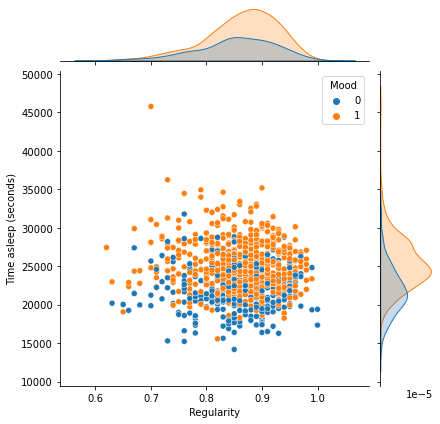

In [84]:
sns.jointplot(data = df , x = 'Regularity', y = 'Time asleep (seconds)', kind = 'scatter', hue = 'Mood')

Из вышепроиллюстрированного видим, что при соблюдении подопытным режима сна (на уровне 80 процентов и больше) и при наличии хотя бы 6 часового сна, настроение будет хорошим.

##### Steps

C:\Users\niksp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Steps'>

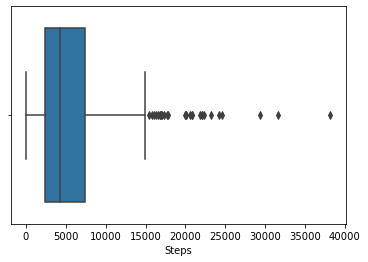

In [85]:
sns.boxplot(df['Steps'])

Удалим выбросы.

In [86]:
df = df.loc[df['Steps'] < 15000]
df.shape

(860, 12)

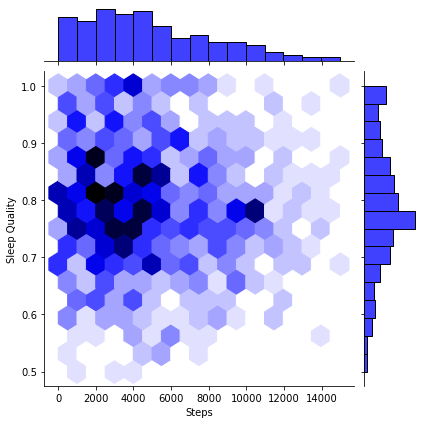

In [87]:
sns.jointplot(data = df, x = 'Steps', y = 'Sleep Quality', kind = 'hex', color = 'blue' )

Можно сделать вывод, что чаще всего испытуемый совершает до 4000 шагов в сутки. При этом показатели качества сна средние  - на уровне 70 - 80 процентов. Интересная деталь: испытуемый часто совершает примерно 10000 шагов, при этом качество сна также на уровне примерно 75 процентов. 

Большое количество шагов (> 10000) слабо влияет на качество сна - в равных количествах встречаются как хорошие, так и плохие показатели качества сна.

Исследуем зависимость признаков Steps и Did snore.

<AxesSubplot:xlabel='Did snore', ylabel='Steps'>

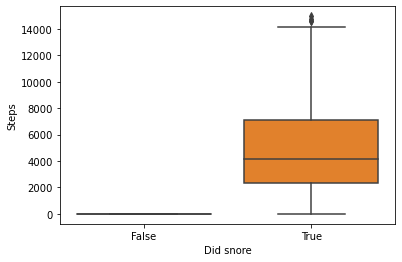

In [88]:
sns.boxplot(data = df, x = 'Did snore', y = 'Steps')

In [89]:
df[df['Did snore'] == False].shape[0]

7

In [90]:
df[df['Did snore'] == False]

,Sleep Quality,Regularity,Steps,Alarm mode,Air Pressure (Pa),Movements per hour,Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather type,Mood
542,0.65,0.91,0,Normal,0.0,67.6,19001.3,487.2,False,0.0,No weather,0
562,0.74,0.90,0,Normal,93.1,36.9,23664.1,522.0,False,0.0,No weather,0
573,0.81,0.90,0,Normal,92.9,47.1,25425.8,591.3,False,0.0,No weather,1
613,0.79,0.91,0,Normal,93.7,96.3,25484.0,581.4,False,0.0,Partly cloudy,1
642,0.59,0.85,0,Normal,94.3,56.0,16394.8,1296.0,False,0.0,Sunny,0
717,0.79,0.83,0,Normal,93.4,2478.8,23866.8,561.6,False,0.0,Sunny,1
865,0.69,0.90,0,Normal,95.8,45.4,21800.8,511.0,False,0.0,Sunny,0


Любопытно, что значений, когда человек не храпел, всего 7, а количество шагов при этом везде равно 0. 

#### Alarm mode

In [91]:
df['Alarm mode'].unique()

array(['Normal', 'No alarm'], dtype=object)

<AxesSubplot:xlabel='Alarm mode', ylabel='Count'>

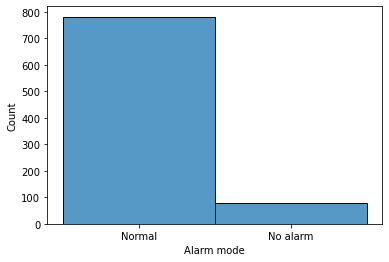

In [92]:
sns.histplot(data= df, x='Alarm mode')

<AxesSubplot:xlabel='Alarm mode', ylabel='Sleep Quality'>

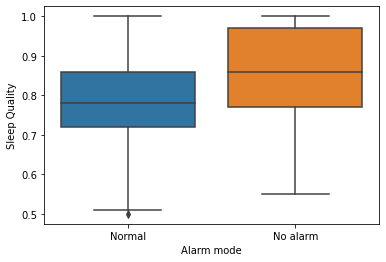

In [93]:
sns.boxplot(data = df, x = 'Alarm mode', y = 'Sleep Quality')

Чаще всего испытуемый просыпается по будильнику, однако, если он выключен, то качество сна лучше.

#### Air Pressure (Pa)

In [94]:
df[df['Air Pressure (Pa)'] == 0].shape[0]

124

Была мысль поработать с пропусками в данном признаке, но в нем половина из значений пропуски, и ещё треть от оставшихся значений нули. Таким образом, проще удалить данный признак из датасета.

In [95]:
df = df.drop('Air Pressure (Pa)', axis = 1)

In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 2 to 920
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sleep Quality                860 non-null    float64
 1   Regularity                   860 non-null    float64
 2   Steps                        860 non-null    int64  
 3   Alarm mode                   860 non-null    object 
 4   Movements per hour           860 non-null    object 
 5   Time asleep (seconds)        860 non-null    float64
 6   Time before sleep (seconds)  860 non-null    float64
 7   Did snore                    860 non-null    bool   
 8   Snore time                   860 non-null    float64
 9   Weather type                 860 non-null    object 
 10  Mood                         860 non-null    int64  
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 107.0+ KB
None


#### Movements per hour

In [97]:
df['Movements per hour']

2                     60.5
3                     45.2
4                     44.6
5                     58.0
7                     51.0
              ...         
913                   31.6
914    2022-09-30 00:00:00
915                   45.1
916                   39.7
920                   38.2
Name: Movements per hour, Length: 860, dtype: object

Видим, что в столбце Movements per hour встречаются данные типа datetime. Можно попробовать оценить их количество и заменить на нормальные числа типа float64, чтобы поработать с этим признаком.

Сразу конвертировать весь столбец в тип float64 с помощью метода astype() не получится, т.к. этот метод не может преобразовать нечисловые значения, которые, как видно выше, встречаются в столбце Movements per hour.

In [98]:
isinstance(df.iloc[856,6], datetime)

False

In [99]:
count = 0
for i, row in df.iterrows():
    if isinstance(row['Movements per hour'], datetime):
        count +=1
print(count)

120


Видно, что в столбце Movements per hour всего 120 значений типа данных datetime. С этим можно работать. Заменим такие значения либо на среднее арифметическое оставшихся значений, либо на их среднеквадратичное отклонение, либо на медиану.

In [100]:
count = 0
mov_per_hour = []
for i, row in df.iterrows():
    if isinstance(row['Movements per hour'], datetime):
        continue
    else:
        row['Movements per hour'] = float(row['Movements per hour'])
        mov_per_hour.append(float(row['Movements per hour']))

np_mov_per_hour = np.array(mov_per_hour)

In [101]:
np_mov_per_hour[np_mov_per_hour > 130]

array([  141.7,   132.6,   159.4,   135.9,   142.2,   149.4,   174.8,
         175.6,   139.4,  3765.1,  3868.6,  1418.5,  1965.3,  2442.5,
        3730.3,  3055.8,  1544.2,  2813. ,  3100.6,   199.7,   229. ,
        5811.2,  4300. ,  3492.5,  3539.7,  2634.7,  2594.2,  2736.5,
        2854.8,  2735.8,  1349.5,  1033.5,  1516.9,  1587.5,  1701.5,
        1603. , 17926.7,  1527.1,  5268.2,  4381.3,  2478.8,   136.8,
         185.3,   194.2])

Присутствуют выбросы. Избавимся от них.

In [102]:
np_mov_per_hour = np_mov_per_hour[np_mov_per_hour < 130]

In [103]:
print('Среднее арифметическое оставшихся значений: %f' %(np_mov_per_hour.mean()),
      'Среднеквадратичное отклонение оставшихся значений: %f' %(np.std(np_mov_per_hour)),
      'Медиана оставшихся значений: %f' %(np.median(np_mov_per_hour)), sep='\n')

Среднее арифметическое оставшихся значений: 55.212931
Среднеквадратичное отклонение оставшихся значений: 18.443236
Медиана оставшихся значений: 51.050000


In [104]:
# type(df.iloc[656,6])

In [105]:
mov_per_hour_1 = []
for i, row in df.iterrows():
    if isinstance(row['Movements per hour'], datetime):
        mov_per_hour_1.append(np.median(np_mov_per_hour))
    else:
        mov_per_hour_1.append(float(row['Movements per hour']))

df['Movements per hour'] = mov_per_hour_1
df['Movements per hour']                            

2      60.50
3      45.20
4      44.60
5      58.00
7      51.00
       ...  
913    31.60
914    51.05
915    45.10
916    39.70
920    38.20
Name: Movements per hour, Length: 860, dtype: float64

In [106]:
df = df[(df['Movements per hour'] < 120) & (df['Movements per hour'] > 20)]
print(df.shape)

(811, 11)


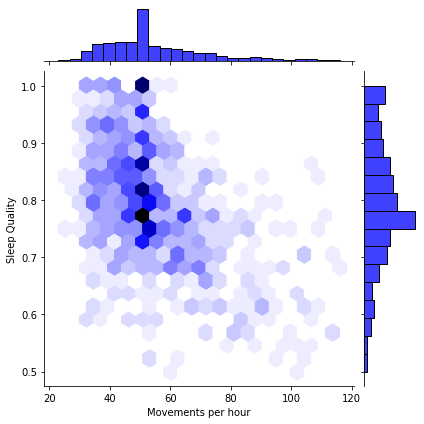

In [107]:
sns.jointplot(data = df, x = 'Movements per hour', y = 'Sleep Quality', kind = 'hex', color = 'blue' )

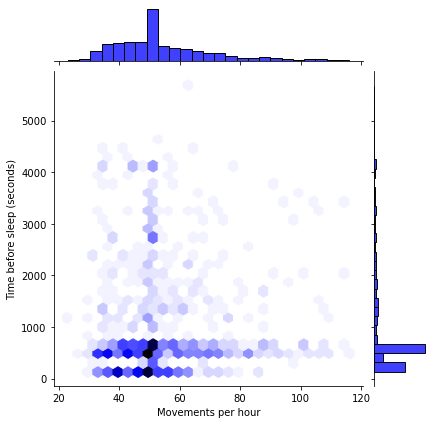

In [108]:
sns.jointplot(data = df, x = 'Movements per hour', y = 'Time before sleep (seconds)', kind = 'hex', color = 'blue' )

Чаще всего, при совершении 40-60 движений в час на протяжении всего дня, человеку требовалось меньше 30 минут для того, чтобы он уснул

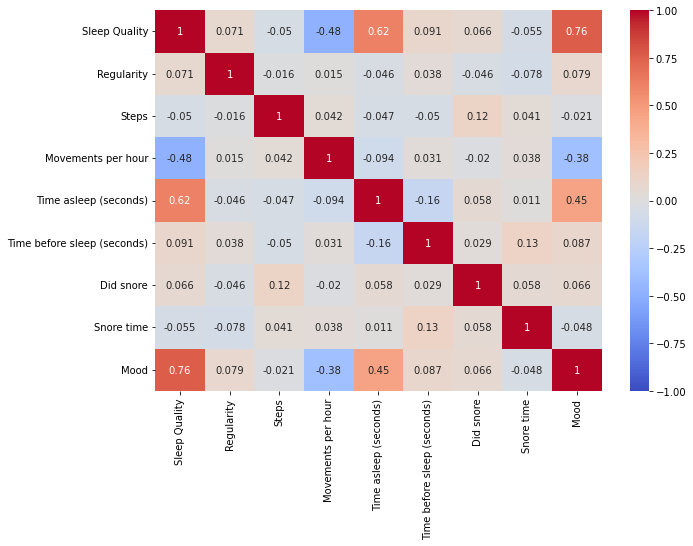

In [109]:
plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
sns.heatmap(df.corr(), cmap = sns.color_palette('coolwarm', 10000), vmin = -1, center = 0, annot = True)
plt.show()

#### Time asleep (seconds)

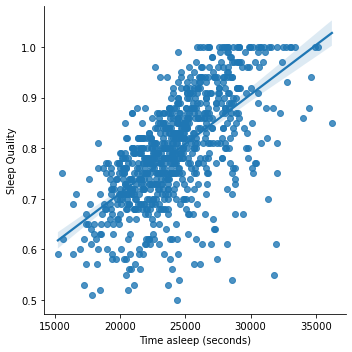

In [110]:
sns.lmplot(data = df, x = 'Time asleep (seconds)', y = 'Sleep Quality')

In [111]:
### написать вывод

#### Time before sleep (seconds)

In [112]:
df = df.loc[df['Time before sleep (seconds)'] < 3600 ] # Оставим значения до 1 часа
df.shape

(772, 11)

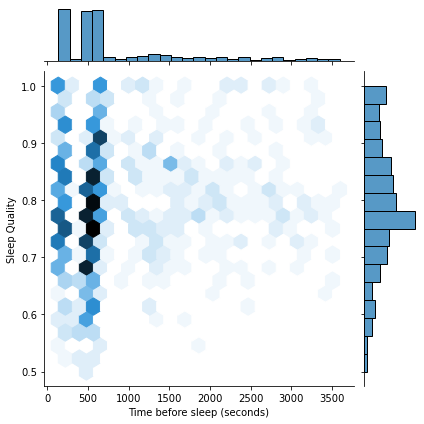

In [113]:
sns.jointplot(data = df, x = 'Time before sleep (seconds)', y = 'Sleep Quality', kind = 'hex')

#### Did snore

<AxesSubplot:xlabel='Did snore', ylabel='Sleep Quality'>

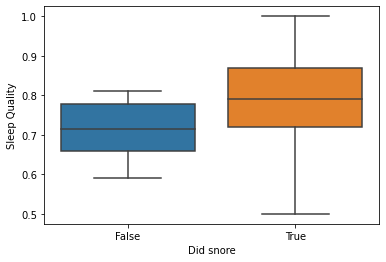

In [114]:
sns.boxplot(data = df, x = 'Did snore', y = 'Sleep Quality')

Показатели качества лучше, когда человек храпит.

<AxesSubplot:xlabel='Did snore', ylabel='Time asleep (seconds)'>

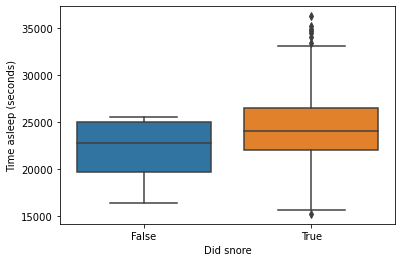

In [116]:
sns.boxplot(data = df, x = 'Did snore', y = 'Time asleep (seconds)')

#### Snore time

In [117]:
df[df['Snore time'] == 0].shape[0]

265

Наблюдается аномалия данных: в датасете есть значения, в которых признак Did snore = True (человек храпел ночью) и значение признака Snore time = 0 (продолжительность храпа).

Можно попробовать заменить нулевые значения на статистические данные (mean, std, quantile, max) по этому столбцу и посмотреть, что подойдет лучше всего.

In [118]:
df.loc[(df['Snore time'] == 0) & (df['Did snore'] == True),'Snore time'] = df['Snore time'].mean()
# df.loc[df['Snore time'] == 0,'Snore time'] = df['Snore time'].std(ddof = 0)  Изменить условие с = 0 на = .mean()

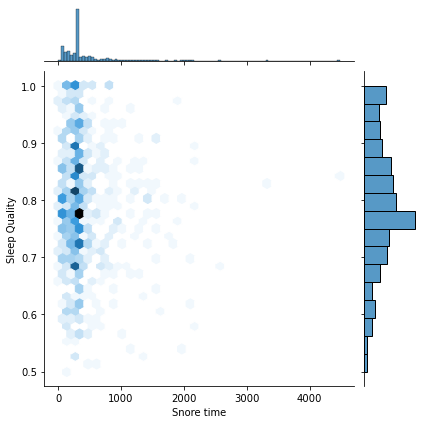

In [119]:
sns.jointplot(data = df, x = 'Snore time', y = 'Sleep Quality', kind = 'hex')

Уберем выбросы.

In [120]:
df = df.loc[df['Snore time'] < 1100 ] # Оставим значения до 1 часа
df.shape

(721, 11)

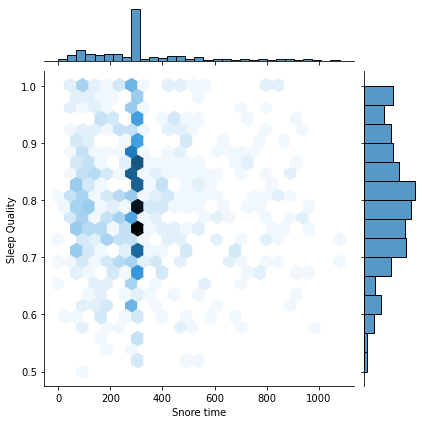

In [121]:
sns.jointplot(data = df, x = 'Snore time', y = 'Sleep Quality', kind = 'hex')

Интересный факт, судя по графику, человек чаще всего храпит одно и то же количество времени (примерно 300 секунд), при этом, чаще всего, качество сна составляет 70-80 %.

#### Weather type

<AxesSubplot:xlabel='Weather type', ylabel='Sleep Quality'>

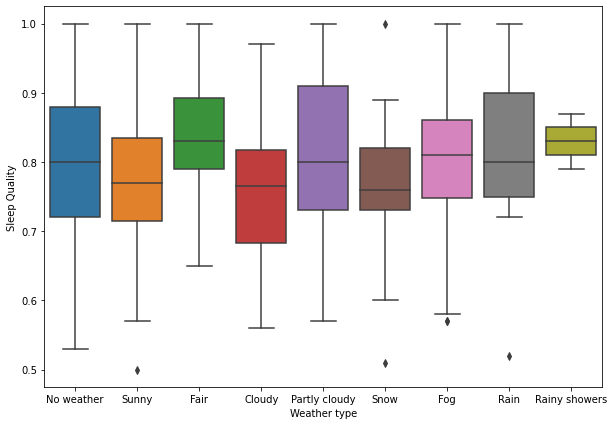

In [126]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
sns.boxplot(data = df, x = 'Weather type', y = 'Sleep Quality')

<AxesSubplot:xlabel='Weather type', ylabel='Count'>

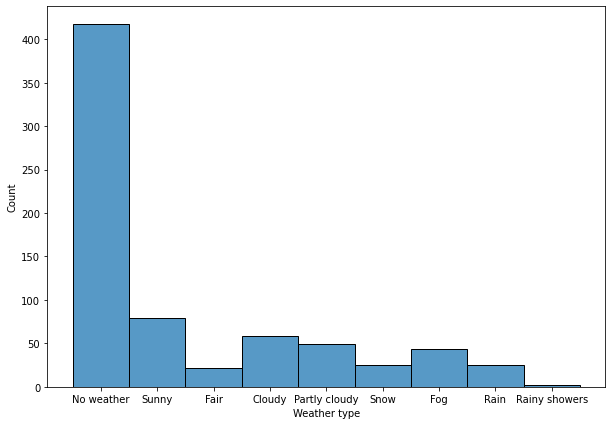

In [129]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
sns.histplot(data= df, x='Weather type')